# Libraries Used

In [1]:
import numpy as np
import scipy 
import scipy.misc
from keras.models import *
from keras.layers import Input, merge, Conv1D,Conv2D, MaxPooling2D, UpSampling2D, Dropout, Cropping2D
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from keras.models import load_model
import matplotlib.pyplot as plt

C:\Users\Me\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading the Model

In [2]:
model = load_model('aerial_model.h5')

C:\Users\Me\Anaconda3\lib\site-packages\keras\engine\topology.py:1269: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  return cls(**config)


# Test Image Extracted from Google Earth

In [47]:
#X_test = X_test_load(size=2)
X_test = np.expand_dims(scipy.misc.imread('westphilly_test11.tif').T,axis=0)

print(X_test.shape)
X_test = X_test.reshape(*X_test.shape,1)
X_test = X_test.astype('float32')
X_test/= 255

(1, 512, 512)


# Predicting the Segmentation

In [48]:
Y_test = model.predict(X_test, verbose=1)

1/1 [==============================] - 22s 22s/step


# Plotting the Segmentation

In [49]:
def op(X_test,Y_test,size):
    for i in range(0,size):
        plt.figure(figsize=(10,8))
        plt.subplot(1, 2, 1)
        
        a = Y_test[i].copy()
        c = a.flatten().reshape(512,512).T
        plt.imshow(c, cmap='Greys');
        #plt.colorbar()
        
        plt.subplot(1, 2, 2)

        c_bar = X_test[i].reshape(512,512).T
        plt.imshow(c_bar, cmap='Greys');
        #plt.colorbar()
        
        plt.show()

In [50]:
Y_test[Y_test > 0.3] = 1
Y_test[Y_test <= 0.3] = 0

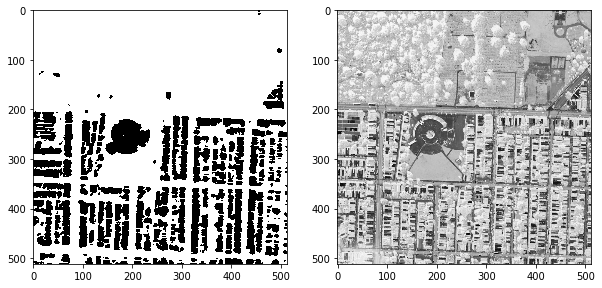

In [51]:

op(X_test,Y_test,1)

In [21]:
loss = [0.4922,0.3873,0.2992,0.2765,0.2586,0.2454,0.2339,0.2249,0.2132,0.2037]

acc = [0.8494, 0.8592, 0.8812, 0.8877, 0.8942, 0.9000,0.9040,0.9088,0.9128,0.9166]

val_loss = [0.5976,0.4586,0.4330,0.4260,0.4037,0.4219,0.3850,0.4197,0.3706,0.3568]

val_acc = [0.7383,0.7950,0.8048,0.8061,0.8195,0.8165,0.8307,0.8193,0.8351,0.8448]

epoch = range(1,11)

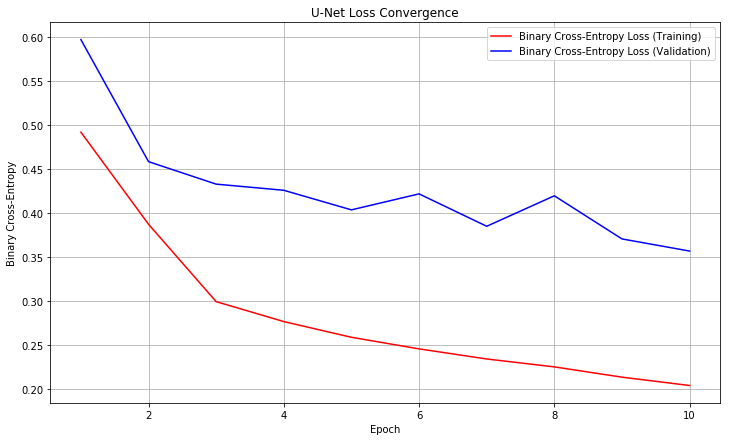

In [27]:
plt.figure(figsize=(12,7))
plt.plot(epoch, loss,'r',label='Binary Cross-Entropy Loss (Training)')
plt.plot(epoch, val_loss,'b',label='Binary Cross-Entropy Loss (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy')
plt.title('U-Net Loss Convergence')
plt.grid()
plt.legend()
plt.show()

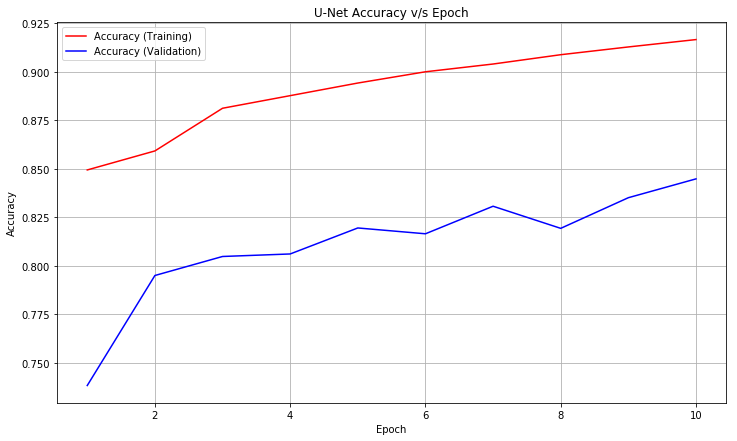

In [28]:
plt.figure(figsize=(12,7))
plt.plot(epoch, acc,'r',label='Accuracy (Training)')
plt.plot(epoch, val_acc,'b',label='Accuracy (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('U-Net Accuracy v/s Epoch')
plt.grid()
plt.legend()
plt.show()